# Ecommerce Data Analysis

## Descriptive Statistics and Visualizations

### Libraries & Colors

In [1]:
# these are essential libraries to manipulate and visualize the data
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# this part of the code needs to changed with your plotly credentials
# If you don't want to create a plotly plot, skip this step and the ones related with the plotly 
import chart_studio
from plotly_credentials import *
chart_studio.tools.set_credentials_file(username=plotly_username, api_key=plotly_api_key)

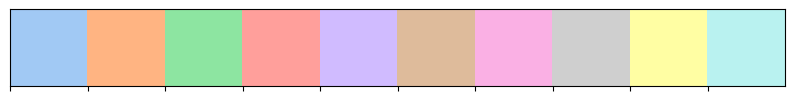

In [3]:
# to show color palette we used in this notebook
sns.palplot(sns.color_palette('pastel', 10))
colors = sns.color_palette('pastel', 10)

In [4]:
# this part is needed for an advanced statistical data analysis. Main objective of such an analysis is that 
# to identify patterns and trends in the data as well-known data distributions which can be employed in some analysis 
# which cannot be conducted by using emprical datasets. 
# If you're thinking that some of the terms in this explanation are new to you, 
# you may need to check out the theory of probability and statistics.
from fitter import Fitter, get_common_distributions, get_distributions

In [5]:
# this part may also not be needed to run. Main motivation to have this is to show version of libraries used in this notebook.
# current working directory can be crucical. It's important to know where you are.
import sys
import os

In [6]:
print("Current working directory: ", os.getcwd())
print("python version: ", sys.version)

print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("seaborn version: ", sns.__version__)

Current working directory:  /Users/stopdemir/Documents/GitHub/ecommerce-data-analysis
python version:  3.8.19 (default, Mar 20 2024, 15:00:34) 
[Clang 14.0.6 ]
numpy version:  1.24.3
pandas version:  2.0.3
seaborn version:  0.12.2


### Datasets

#### Importing the Datasets

In the descriptive data analysis, I mostly focused on the datasets below except df_target_train and df_test. In the further sections, these two datasets will be also investigated.

In [7]:
df_product = pd.read_csv('data/df_product.csv')
df_demo = pd.read_csv('data/df_demo.csv') # Users' demographics data

df_visit = pd.read_csv('data/df_visit.csv')
df_basket = pd.read_csv('data/df_basket.csv')
df_fav = pd.read_csv('data/df_fav.csv')
df_trx = pd.read_csv('data/df_trx.csv') #purchasing data

df_search_term = pd.read_csv('data/df_search_term.csv')

In [8]:
df_target_train = pd.read_csv('data/df_target_train.csv')
df_test = pd.read_csv('data/df_test.csv')

a quick look at the datasets' columns to have an idea what we're working with

Text(0.5, 1.0, 'Number of Rows in Multiple Data Frames')

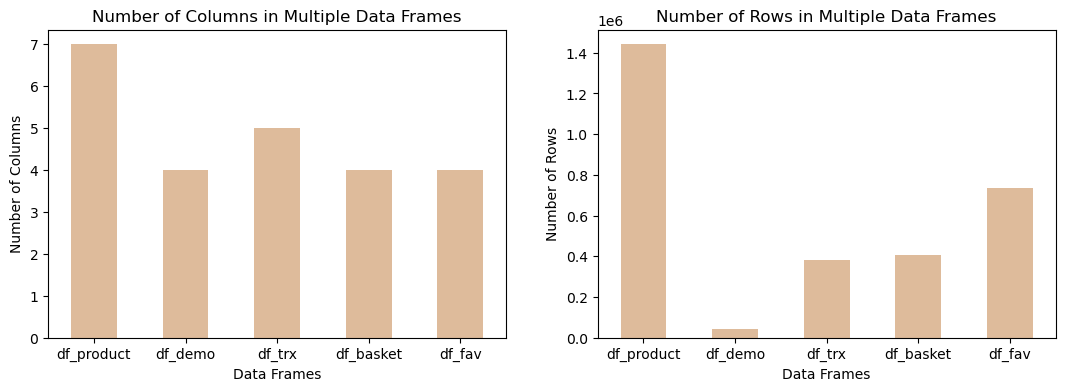

In [8]:
data_frames = [df_product, df_demo, df_trx, df_basket, df_fav]
data_frames_names = ["df_product", "df_demo", "df_trx", "df_basket", "df_fav"]

df_info = pd.DataFrame([(df.shape[0], df.shape[1]) for df in data_frames],
                       columns=['Rows', 'Columns'])

# Plotting for Number of Columns
fig, (ax_cols, ax_rows) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

df_info['Columns'].plot(kind='bar', ax=ax_cols, color=colors[5])
ax_cols.set_xticklabels([f'{df}' for df in data_frames_names], rotation=0)
ax_cols.set_xlabel('Data Frames')
ax_cols.set_ylabel('Number of Columns')
ax_cols.set_title('Number of Columns in Multiple Data Frames')

# Plotting for Number of Rows
df_info['Rows'].plot(kind='bar', ax=ax_rows, color=colors[5])
ax_rows.set_xticklabels([f'{df}' for df in data_frames_names], rotation=0)
ax_rows.set_xlabel('Data Frames')
ax_rows.set_ylabel('Number of Rows')
ax_rows.set_title('Number of Rows in Multiple Data Frames')

#### df_product

df_product: Products' information data

- **contentid:** Unique ID given to the product.
- **currentbugroupname:** Business Group Name (can be thought of as a broader category of the product.
- **brandid:** Unique ID given to the brand of the product.
- **gender:** Target gender group of the product.
- **age:** Target age group of the product.
- **title:** Title of the product.
- **categoryname:** Category name of the product.

In [9]:
df_product.head(10)

,contentid,currentbugroupname,brandid,gender,age,title,categoryname
0,40100964,Ayakkabı & Çanta,37787,Erkek,Yetişkin,Siyah Kauçuk Taban Büyük Numara Spor Ayakkab R...,Klasik Ayakkabı
1,40427970,Branded Tekstil,169,Kadın,Yetişkin,Kadın Siyah Çizgili Cepli Kuşaklı Pantolon,Pantolon
2,41026644,FMCG,20150,Unisex,Yetişkin,Color Growth Healt Formula (800-1200) 100gr Aç...,Akvaryum Balık Yemleri
3,41227029,Branded Tekstil,11806,Kadın,Yetişkin,Kadın Pamuk Paçalı Ribana Külot B005,Külot
4,40770080,Ev,2195,Unisex,Yetişkin,Suki - Sushi Seti 8 Parça,Tabak
5,32196943,GAS,366101,Erkek,Yetişkin,Erkek Eşofman Altı - S -,Spor Eşofman Altı
6,41767813,GM,17150,Unisex,Yetişkin,Hayati Inanç Can Veren Pervaneler Set 6 Kitap,Deneme - İnceleme
7,33011110,Branded Tekstil,877,Erkek,Yetişkin,Micro Dokuma Takım Elbise,Takım Elbise
8,41838807,Branded Tekstil,1220,Kadın,Yetişkin,V Yaka Bluz - Kiremit Çiçekli,Bluz
9,42791183,Branded Tekstil,710,Unisex,Yetişkin,Siyah Tek Kollu Askılı Uzun Abiye Elbise,Abiye & Mezuniyet Elbisesi


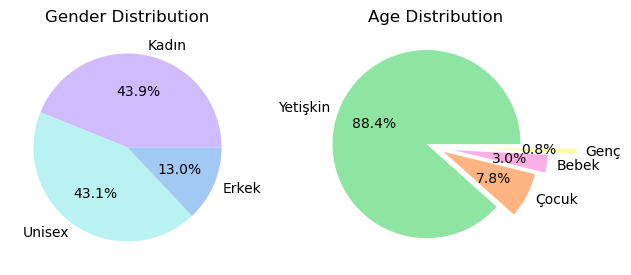

In [45]:
# create pie chart for the gender and age features separately. Compare the number of products. Please put the charts side by side.
# Create pie chart for the gender feature
colors = sns.color_palette('pastel', 10)
gender_colors = [colors[4], colors[9], colors[0]]
gender_counts = df_product['gender'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=gender_colors)
plt.title('Gender Distribution')

# Create pie chart for the age feature
age_counts = df_product['age'].value_counts()
age_colors = [colors[2], colors[1], colors[6], colors[8]]
explode = [0.1, 0.1, 0.2, 0.5]
plt.subplot(1, 2, 2)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors= age_colors, explode=explode)
plt.title('Age Distribution')

# Adjust the layout to put the charts side by side
plt.tight_layout()

# Show the charts
plt.show()

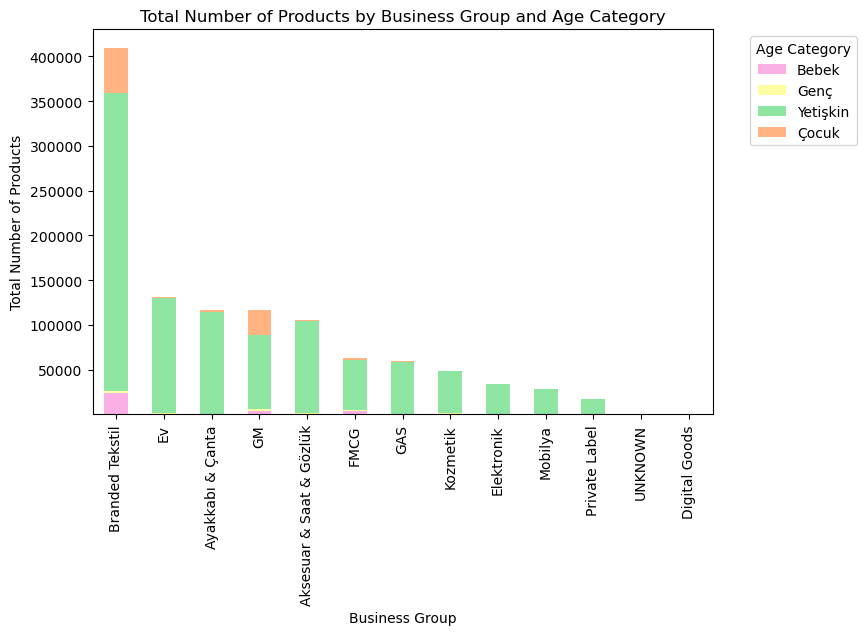

In [46]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_product.groupby(['currentbugroupname', 'age']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

grouped_data = grouped_data.drop(columns='Total')

age_palette = {'Yetişkin': colors[2], 'Çocuk': colors[1], 'Bebek': colors[6], 'Genç': colors[8]}

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(8, 5), color=[age_palette[age] for age in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Age Category')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [12]:
# from wordcloud import WordCloud
#from wordcloud import ImageColorGenerator
#from wordcloud import STOPWORDS

# the problem here is that the words in the STOPWORDS are in English. However, we are interested in Turkish.
# my_text = " ".join(i for i in df_product.title.astype(str))
# print(my_text)
# print("sdsd")
# stopwords = set(STOPWORDS)
# print(stopwords)
# wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#  plt.figure( figsize=(15,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

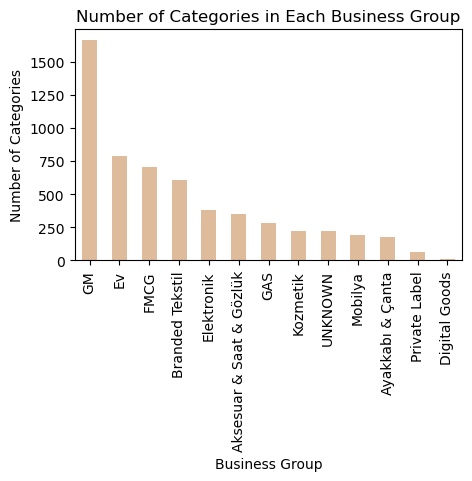

In [17]:
category_counts = df_product.groupby('currentbugroupname')['categoryname'].nunique()

category_counts_sorted = category_counts.sort_values(ascending=False)
# Plot the bar chart
ax = category_counts_sorted.plot(kind='bar', figsize=(5, 3), color=colors[5])
ax.set_title('Number of Categories in Each Business Group')
ax.set_xlabel('Business Group')
ax.set_ylabel('Number of Categories')

# Show the plot
plt.show()

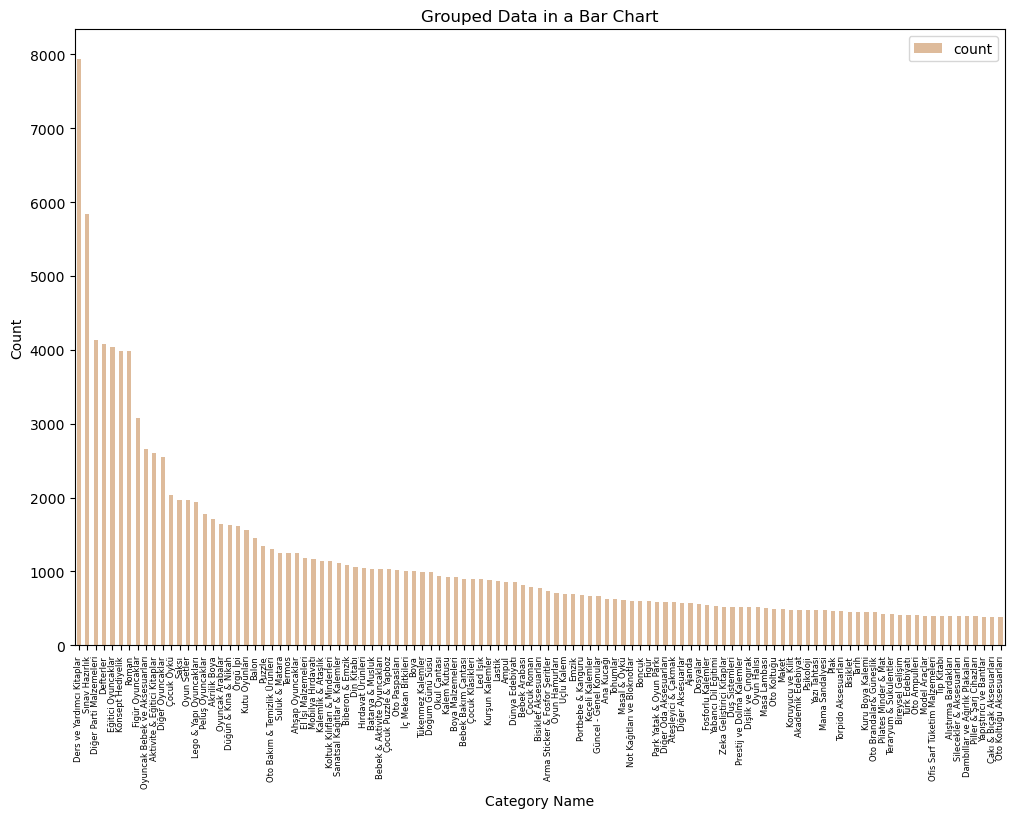

In [13]:
# change the business group name with one you want to see for example GM, Ev, FMCG, etc.
df_product_sub = df_product[df_product["currentbugroupname"]== "GM"]
grouped_data = df_product_sub.groupby("categoryname").size().reset_index(name="count").sort_values(by="count", ascending=False)


# be careful, there is a filter for "count" here
grouped_data[grouped_data["count"] > 380].plot(kind="bar", x="categoryname", y="count", figsize=(12, 8), color=colors[5])
plt.title('Grouped Data in a Bar Chart')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.xticks(fontsize=6)
plt.show()


In [23]:
print("number of business group name: ", df_product_sub["categoryname"].nunique())
print()
print(df_product_sub["categoryname"].unique())

number of business group name:  380

['Bluetooth Kulaklık' 'Bilgisayar&Tablet Aksesuarları' 'USB'
 'Kapak & Kılıf' 'Dik Süpürge' 'Powerbank' 'Şarj Cihazı & Kablo'
 'Akıllı Saat' 'Ekran Koruyucu Film' 'Tıraş Makinesi' 'Oyuncu Monitör'
 'Doğrayıcı&Rondo' 'Lazer Yazıcı' 'Mousepad' 'Klavye' 'Tablet Kılıfı'
 'Akıllı Saat Kordon' 'Tost Makinesi' 'Saç Düzleştirici'
 'Araç İçi Telefon Tutucu' 'Tablet' 'Kablo & Adaptör'
 'Saç Kurutma Makinesi' 'Toz Torbalı Süpürge' 'Mouse'
 'Dijital Fotoğraf Makinesi' 'Su Isıtıcı&Kettle' 'Playstation Oyunları'
 'Tartı' 'Aksiyon Kamerası' 'Soğutucu ve Overclock' 'Bellek (RAM)'
 'Konsol Aksesuarları' 'Fırın' 'Batarya' 'Müzik Setleri & Radyolar'
 'Oyuncu Klavyesi' 'Türk Kahve Makinesi' 'Çay Makinesi' 'Dikiş makinesi'
 'Airpods Kılıf' 'Dizüstü Bilgisayar' 'Bilgisayar Kasası'
 'Oyuncu Kulaklık' 'Blender & Blender Seti' 'Video Kamera'
 'Kablo & Sarf Malzemeler' 'TV Askı Aparatları' 'Süpürge Aksesuarı'
 'Yüz Masaj Aleti' 'Kombi' 'Buharlı Ütü' 'Foto & Kamera Aksesuarla

In [24]:
business_group_name = df_product["currentbugroupname"].unique()
for business_name in business_group_name:
    print("business group name", business_name)
    df = df_product[df_product["currentbugroupname"] == business_name]
    print(df[['currentbugroupname', 'gender', 'age', 'categoryname','title',]].groupby(['currentbugroupname' , 'gender', 'age']).nunique())
    print("###########################################################")


business group name Ayakkabı & Çanta
                                    categoryname  title
currentbugroupname gender age                          
Ayakkabı & Çanta   Erkek  Bebek                6     22
                          Genç                15     54
                          Yetişkin            81  12354
                          Çocuk               27    471
                   Kadın  Bebek               10     66
                          Genç                25    285
                          Yetişkin           105  54793
                          Çocuk               34    727
                   Unisex Bebek               18     87
                          Genç                15     94
                          Yetişkin           103  10731
                          Çocuk               29    766
###########################################################
business group name Branded Tekstil
                                    categoryname   title
currentbugroupname gender 

#### df_demo

 df_demo: Users' demographics data
- **userid:** Unique ID given to the user.
- **gender:** Specified gender of the user.
- **age:** Specified age of the user.
- **tenure:** membership age of the user.

In [14]:
df_demo.head(5)

,userid,gender,age,tenure
0,9798852,Bayan,41.0,89
1,11413556,Bayan,33.0,61
2,818188,Bayan,32.0,125
3,12049002,Bayan,30.0,54
4,10083038,Bayan,39.0,84


In [23]:
df_demo.shape

(40807, 4)

Text(0.5, 1.0, 'Distribution of Ages of Customers')

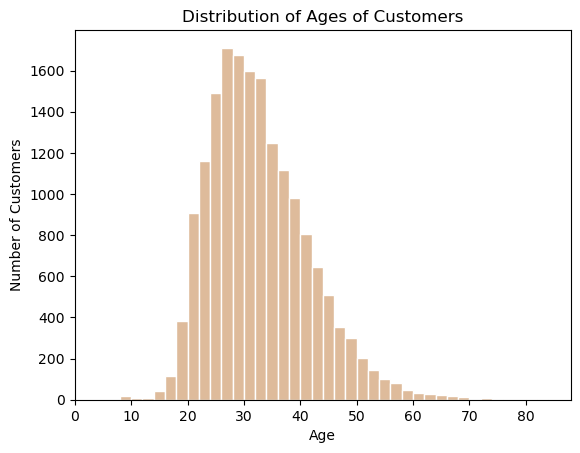

In [26]:

df_demo_filtered = df_demo[(df_demo["age"] < 88) & (df_demo["age"] > 3)]["age"]
plt.hist(df_demo_filtered, bins=40, edgecolor="white", color=colors[5])
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Distribution of Ages of Customers")
# determine the figure size

<Axes: >

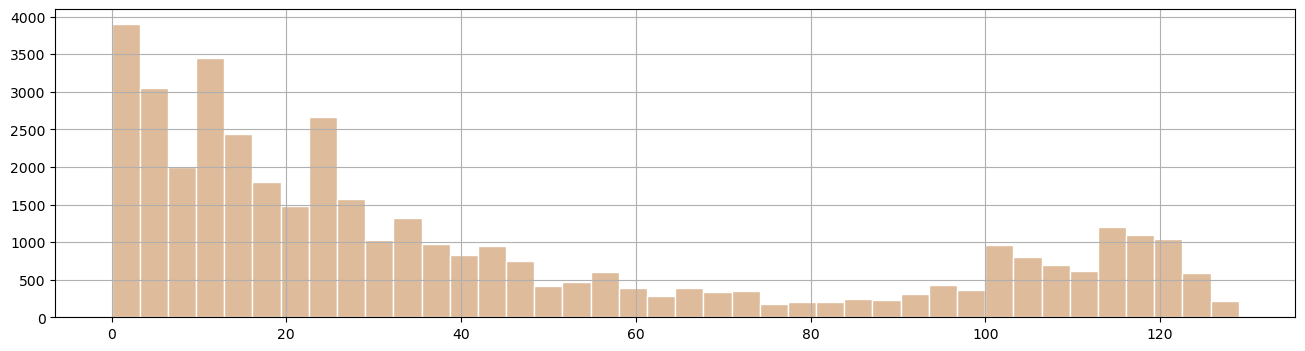

In [30]:
df_demo["tenure"].hist(bins=40,figsize=(16,4),edgecolor = "white", color=colors[5])

/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_4082/1460811716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_processeed["age"] = df_demo_processeed["age"].astype("category")


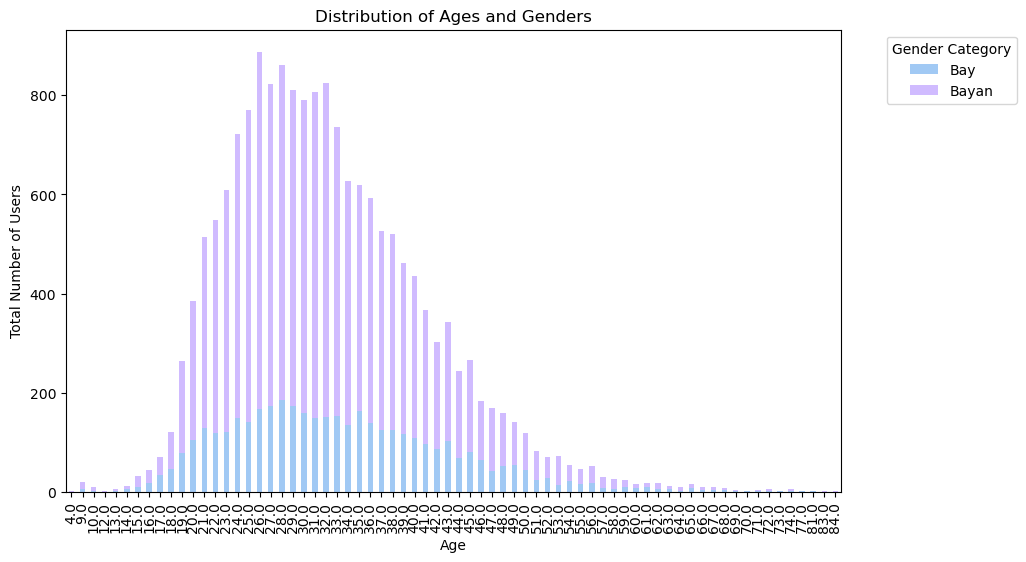

In [17]:
# change the age column type to categorical type and create a stacked bar chart to show the distribution of age and gender
df_demo_processeed = df_demo[(df_demo["age"] < 85) & (df_demo["age"] > 3)]
df_demo_processeed["age"] = df_demo_processeed["age"].astype("category")
df_demo_processeed = df_demo_processeed[(df_demo_processeed["gender"] == "Bayan") | (df_demo_processeed["gender"] == "Bay")]


grouped_data = df_demo_processeed.groupby(['age', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

gender_palette = {'Bayan': colors[4], 'Bay': colors[0]}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Distribution of Ages and Genders')
ax.set_xlabel('Age')
ax.set_ylabel('Total Number of Users')
ax.legend(title='Gender Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

##### fitting a distribution

(0.2393349317196726, -2.7985647339296786, 33.70058956174435)

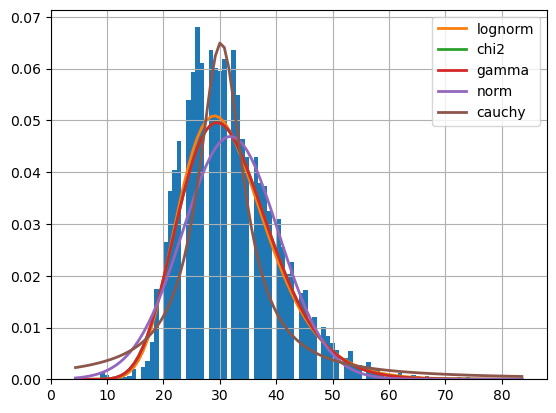

In [18]:
df_demo_processeed_bay = df_demo_processeed[df_demo_processeed["gender"]=="Bay"]
df_demo_processeed_bayan = df_demo_processeed[df_demo_processeed["gender"]=="Bayan"]

age_values_bay = df_demo_processeed_bay["age"].values
age_values_bayan = df_demo_processeed_bayan["age"].values

# f = Fitter(age_values_bay, distributions=['gamma','lognorm',"beta","burr","norm"])
f_bayan = Fitter(age_values_bayan, distributions=get_common_distributions())
f_bayan.fit()
f_bayan.summary()
f_bayan.fitted_param["lognorm"]

(16.542048087033045, 4.817699455094992, 1.7129782425044606)

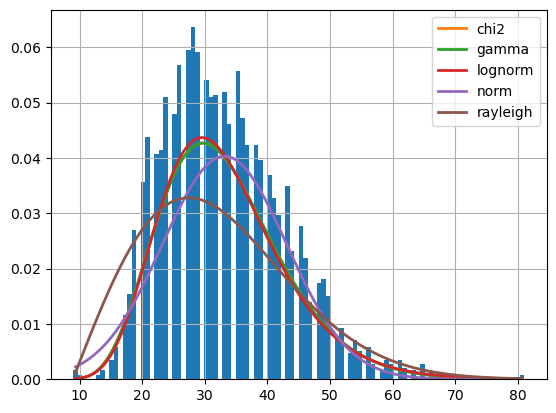

In [19]:
f_bay = Fitter(age_values_bay, distributions=get_common_distributions())
f_bay.fit()
f_bay.summary()
f_bay.fitted_param["chi2"]

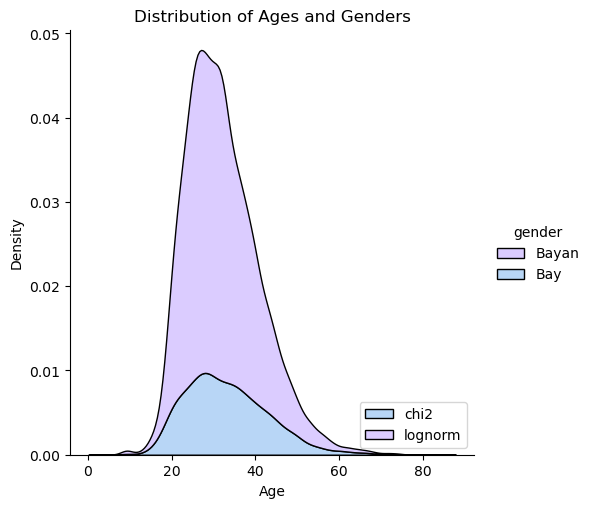

In [36]:
df_demo_processeed["age"] = df_demo_processeed["age"].astype("int")
sns.displot(data = df_demo_processeed, x = 'age', hue = 'gender',multiple='stack',kind='kde',palette=gender_palette, legend=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Distribution of Ages and Genders")
# plt.set(xlabel='age', ylabel='density', title="Distribution of Ages and Genders")
plt.legend(loc="lower right", labels=["chi2","lognorm"])

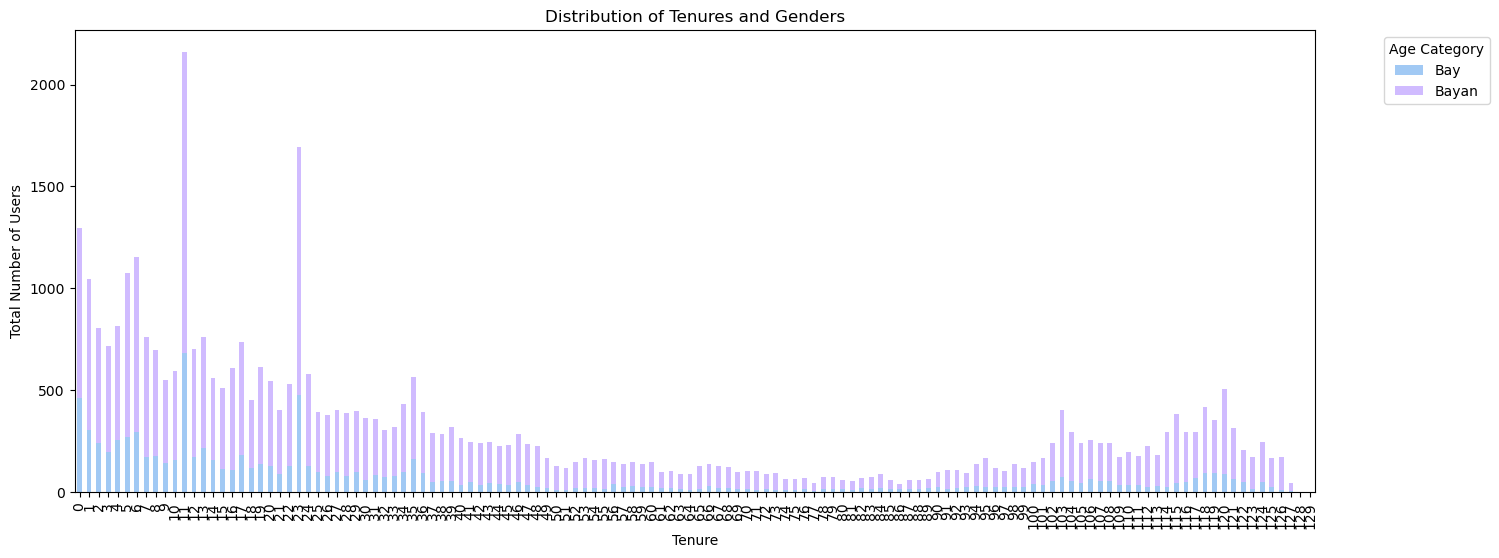

In [32]:
# change the age column type to categorical type and create a stacked bar chart to show the distribution of age and gender
df_demo_copied = df_demo.copy()
df_demo_copied = df_demo_copied[(df_demo_copied["gender"] == "Bayan") | (df_demo_copied["gender"] == "Bay")]

df_demo_copied["tenure"] = df_demo_copied["tenure"].astype("category")

grouped_data = df_demo_copied.groupby(['tenure', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Bayan': colors[4], 'Bay': colors[0]}


# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(16, 6), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Distribution of Tenures and Genders')
ax.set_xlabel('Tenure')
ax.set_ylabel('Total Number of Users')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


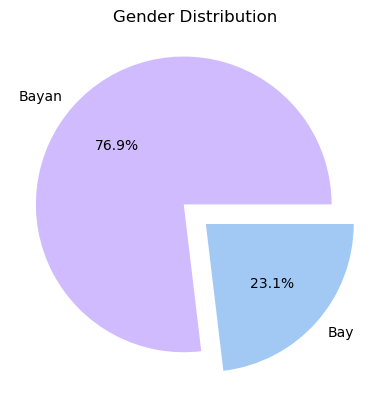

In [20]:
gender_counts = df_demo[(df_demo["gender"] == "Bayan") | (df_demo["gender"] == "Bay")]['gender'].value_counts() # there are really minor amount of "kvkktalepsilindi"
explode = (0.1, 0.1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=[colors[4], colors[0]], explode=explode)
plt.title('Gender Distribution')
plt.show()

#### df_search_term

you may want to add a word cloud visualization here in order to gain deeper insight about users' search terms

In [21]:
df_search_term.head()

,userid,partition_date,search_term
0,29474088,2020-10-05,tum urunler
1,29474088,2020-10-07,nike
2,29474088,2020-10-07,hummel hmlkansas
3,29474088,2020-10-07,adidas superstar
4,29474088,2020-10-09,tum urunler


In [35]:
print(df_search_term.shape)

(1281753, 3)


In [ ]:
# convert object type to string in sf_search_term
df_search_term['search_term'] = df_search_term['search_term'].astype(str)

comment_words = ''
#stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_search_term[:1000].search_term:
	
	# typecaste each val to string
	# val = str(val)

	# split the value
	#tokens = val.split()
	
	# Converts each token into lowercase
	#for i in range(len(val)):
	#	val[i] = ''.join(val[i].lower())
	
	comment_words += " ".join(val)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				#stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### df_trx

df_trx: Users' product purchase data 
- **userid:** Unique ID of the user who has purchased the product.
- **contentid:** Unique ID of the product which has been purchased by the user.
- **orderdate:** Date and hour of the "product purchase" event.
- **quantity:** How many units of this product is purchased during this orderdate.
- **price:** Price of the purchased product.

In [16]:
df_trx.head(5)

,userid,contentid,orderdate,quantity,price
0,16049866,49489653.0,2020-10-31 03:00:00.000,1,199.95
1,14167874,42484094.0,2020-10-31 03:00:00.000,1,69.99
2,14167874,39373962.0,2020-10-31 03:00:00.000,1,69.99
3,13918576,32765999.0,2020-10-31 03:00:00.000,1,43.99
4,10323124,46471016.0,2020-10-31 03:00:00.000,1,58.32


In [22]:
# total number of rows and columns in df_trx
print("total number of data points in the transaction table: ", df_trx.shape[0])
print("total number of columns: ", df_trx.shape[1])
# we need to determine how many unique users we have in df_trx
users_unique_df_trx = df_trx["userid"].nunique()
print("total number of unique users: ", users_unique_df_trx)

total number of data points in the transaction table:  381525
total number of columns:  5
total number of unique users:  31027


In [24]:
# we need to determine how many unique user and product pairs we have in df_trx
unique_pairs = df_trx.groupby(["userid", "contentid"]).size().reset_index().rename(columns={0: "count"})
num_unique_pairs = unique_pairs.shape[0]
print("total number of unique user and product pairs: ", num_unique_pairs)

total number of unique user and product pairs:  366995


check total number of null values in the data frame 

In [ ]:
df_trx.isnull().sum()

userid       0
contentid    0
orderdate    0
quantity     0
price        0
dtype: int64

In [20]:
# removed rows with null values
df_trx = df_trx.dropna()

In [27]:
df_trx["contentid"] = df_trx["contentid"].astype("int")

/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_1471/2778725447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx["contentid"] = df_trx["contentid"].astype("int")


In [28]:
df_trx.head(6)

,userid,contentid,orderdate,quantity,price
0,16049866,49489653,2020-10-31 03:00:00.000,1,199.95
1,14167874,42484094,2020-10-31 03:00:00.000,1,69.99
2,14167874,39373962,2020-10-31 03:00:00.000,1,69.99
3,13918576,32765999,2020-10-31 03:00:00.000,1,43.99
4,10323124,46471016,2020-10-31 03:00:00.000,1,58.32
5,29379994,55117154,2020-10-31 03:00:00.000,1,199.98


In [18]:
min_date = df_trx.orderdate.min()
max_date = df_trx.orderdate.max()
print("min order date: ", min_date)
print("max order date: ", max_date)

min order date:  2020-10-01 04:00:00.000
max order date:  2020-11-01 03:00:00.000


#### df_trx + df_product

In [29]:
df_trx_product = df_trx.merge(df_product, on='contentid', how='left')
df_trx_product.head(5)

,userid,contentid,orderdate,quantity,price,currentbugroupname,brandid,gender,age,title,categoryname
0,16049866,49489653,2020-10-31 03:00:00.000,1,199.95,Branded Tekstil,4951.0,Kadın,Yetişkin,Kadın Siyah Grafik Baskılı Kapüşonlu Sweatshirt,Sweatshirt
1,14167874,42484094,2020-10-31 03:00:00.000,1,69.99,Private Label,40.0,Kadın,Yetişkin,Lacivert Polo Yaka Triko Kazak,Kazak
2,14167874,39373962,2020-10-31 03:00:00.000,1,69.99,Private Label,40.0,Kadın,Yetişkin,Camel Crop ve İspanyol Kollu Triko Kazak,Kazak
3,13918576,32765999,2020-10-31 03:00:00.000,1,43.99,Ev,1222.0,Unisex,Yetişkin,Orva Paslanmaz Çelik Derin Sos Tenceresi - 12 cm,Tava&Tava Seti
4,10323124,46471016,2020-10-31 03:00:00.000,1,58.32,Private Label,40.0,Kadın,Yetişkin,Lila Kazayağı Ceket Gömlek,Gömlek


In [20]:
df_trx_product.shape

(381525, 11)

In [30]:
df_trx_product.isna().sum()

userid                     0
contentid                  0
orderdate                  0
quantity                   0
price                      0
currentbugroupname     91347
brandid                91347
gender                136925
age                   143497
title                  91382
categoryname           91347
dtype: int64

In [31]:
# total number of data points with na in df_trx_product
na_count_trx_product = df_trx_product.isna().sum()
na_count_trx_product

userid                     0
contentid                  0
orderdate                  0
quantity                   0
price                      0
currentbugroupname     91347
brandid                91347
gender                136925
age                   143497
title                  91382
categoryname           91347
dtype: int64

Text(0, 0.5, 'Total Number of Products')

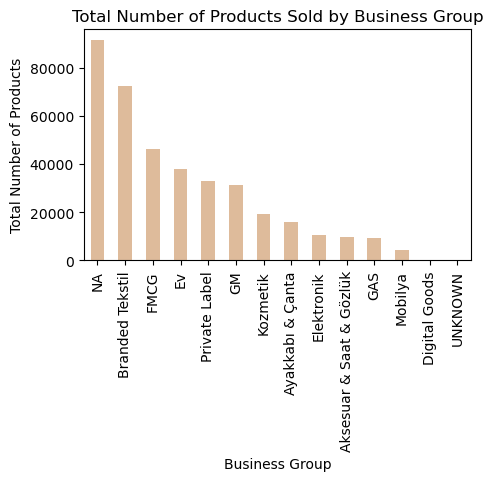

In [33]:
df_trx_product_modified = df_trx_product.fillna('NA')
grouped_data =df_trx_product_modified.groupby('currentbugroupname').size().sort_values(ascending=False)
# make a bar chart for the grouped data
ax = grouped_data.plot(kind='bar', figsize=(5, 3), color = colors[5])
ax.set_title('Total Number of Products Sold by Business Group')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')

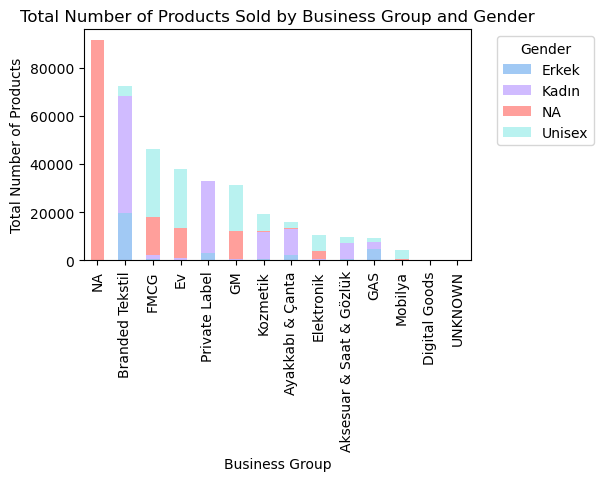

In [36]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_trx_product_modified.groupby(['currentbugroupname', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Erkek': colors[0], 'Kadın': colors[4], 'Unisex': colors[9], 'NA':colors[3]}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products Sold by Business Group and Gender')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

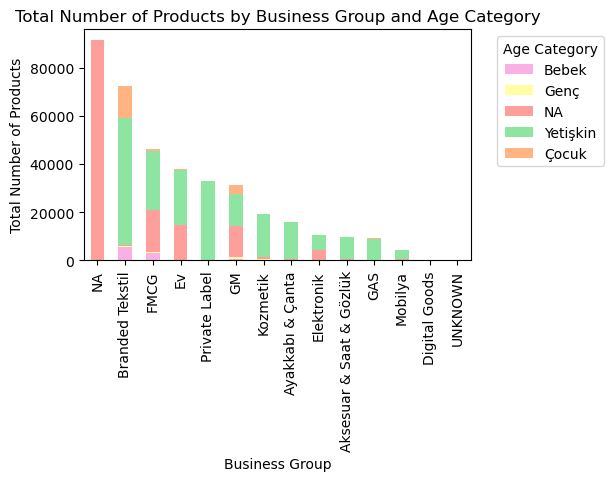

In [47]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_trx_product_modified.groupby(['currentbugroupname', 'age']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
age_palette = {'Yetişkin': colors[2], 'Çocuk': colors[1], 'Bebek': colors[6], 'Genç': colors[8], 'NA':colors[3]}


# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[age_palette[age] for age in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Age Category')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

<font color='red'>BE CAREFUL ON THE DATASET WE USED BELOW. df_trx_product vs. df_trx_product_modified
</font>

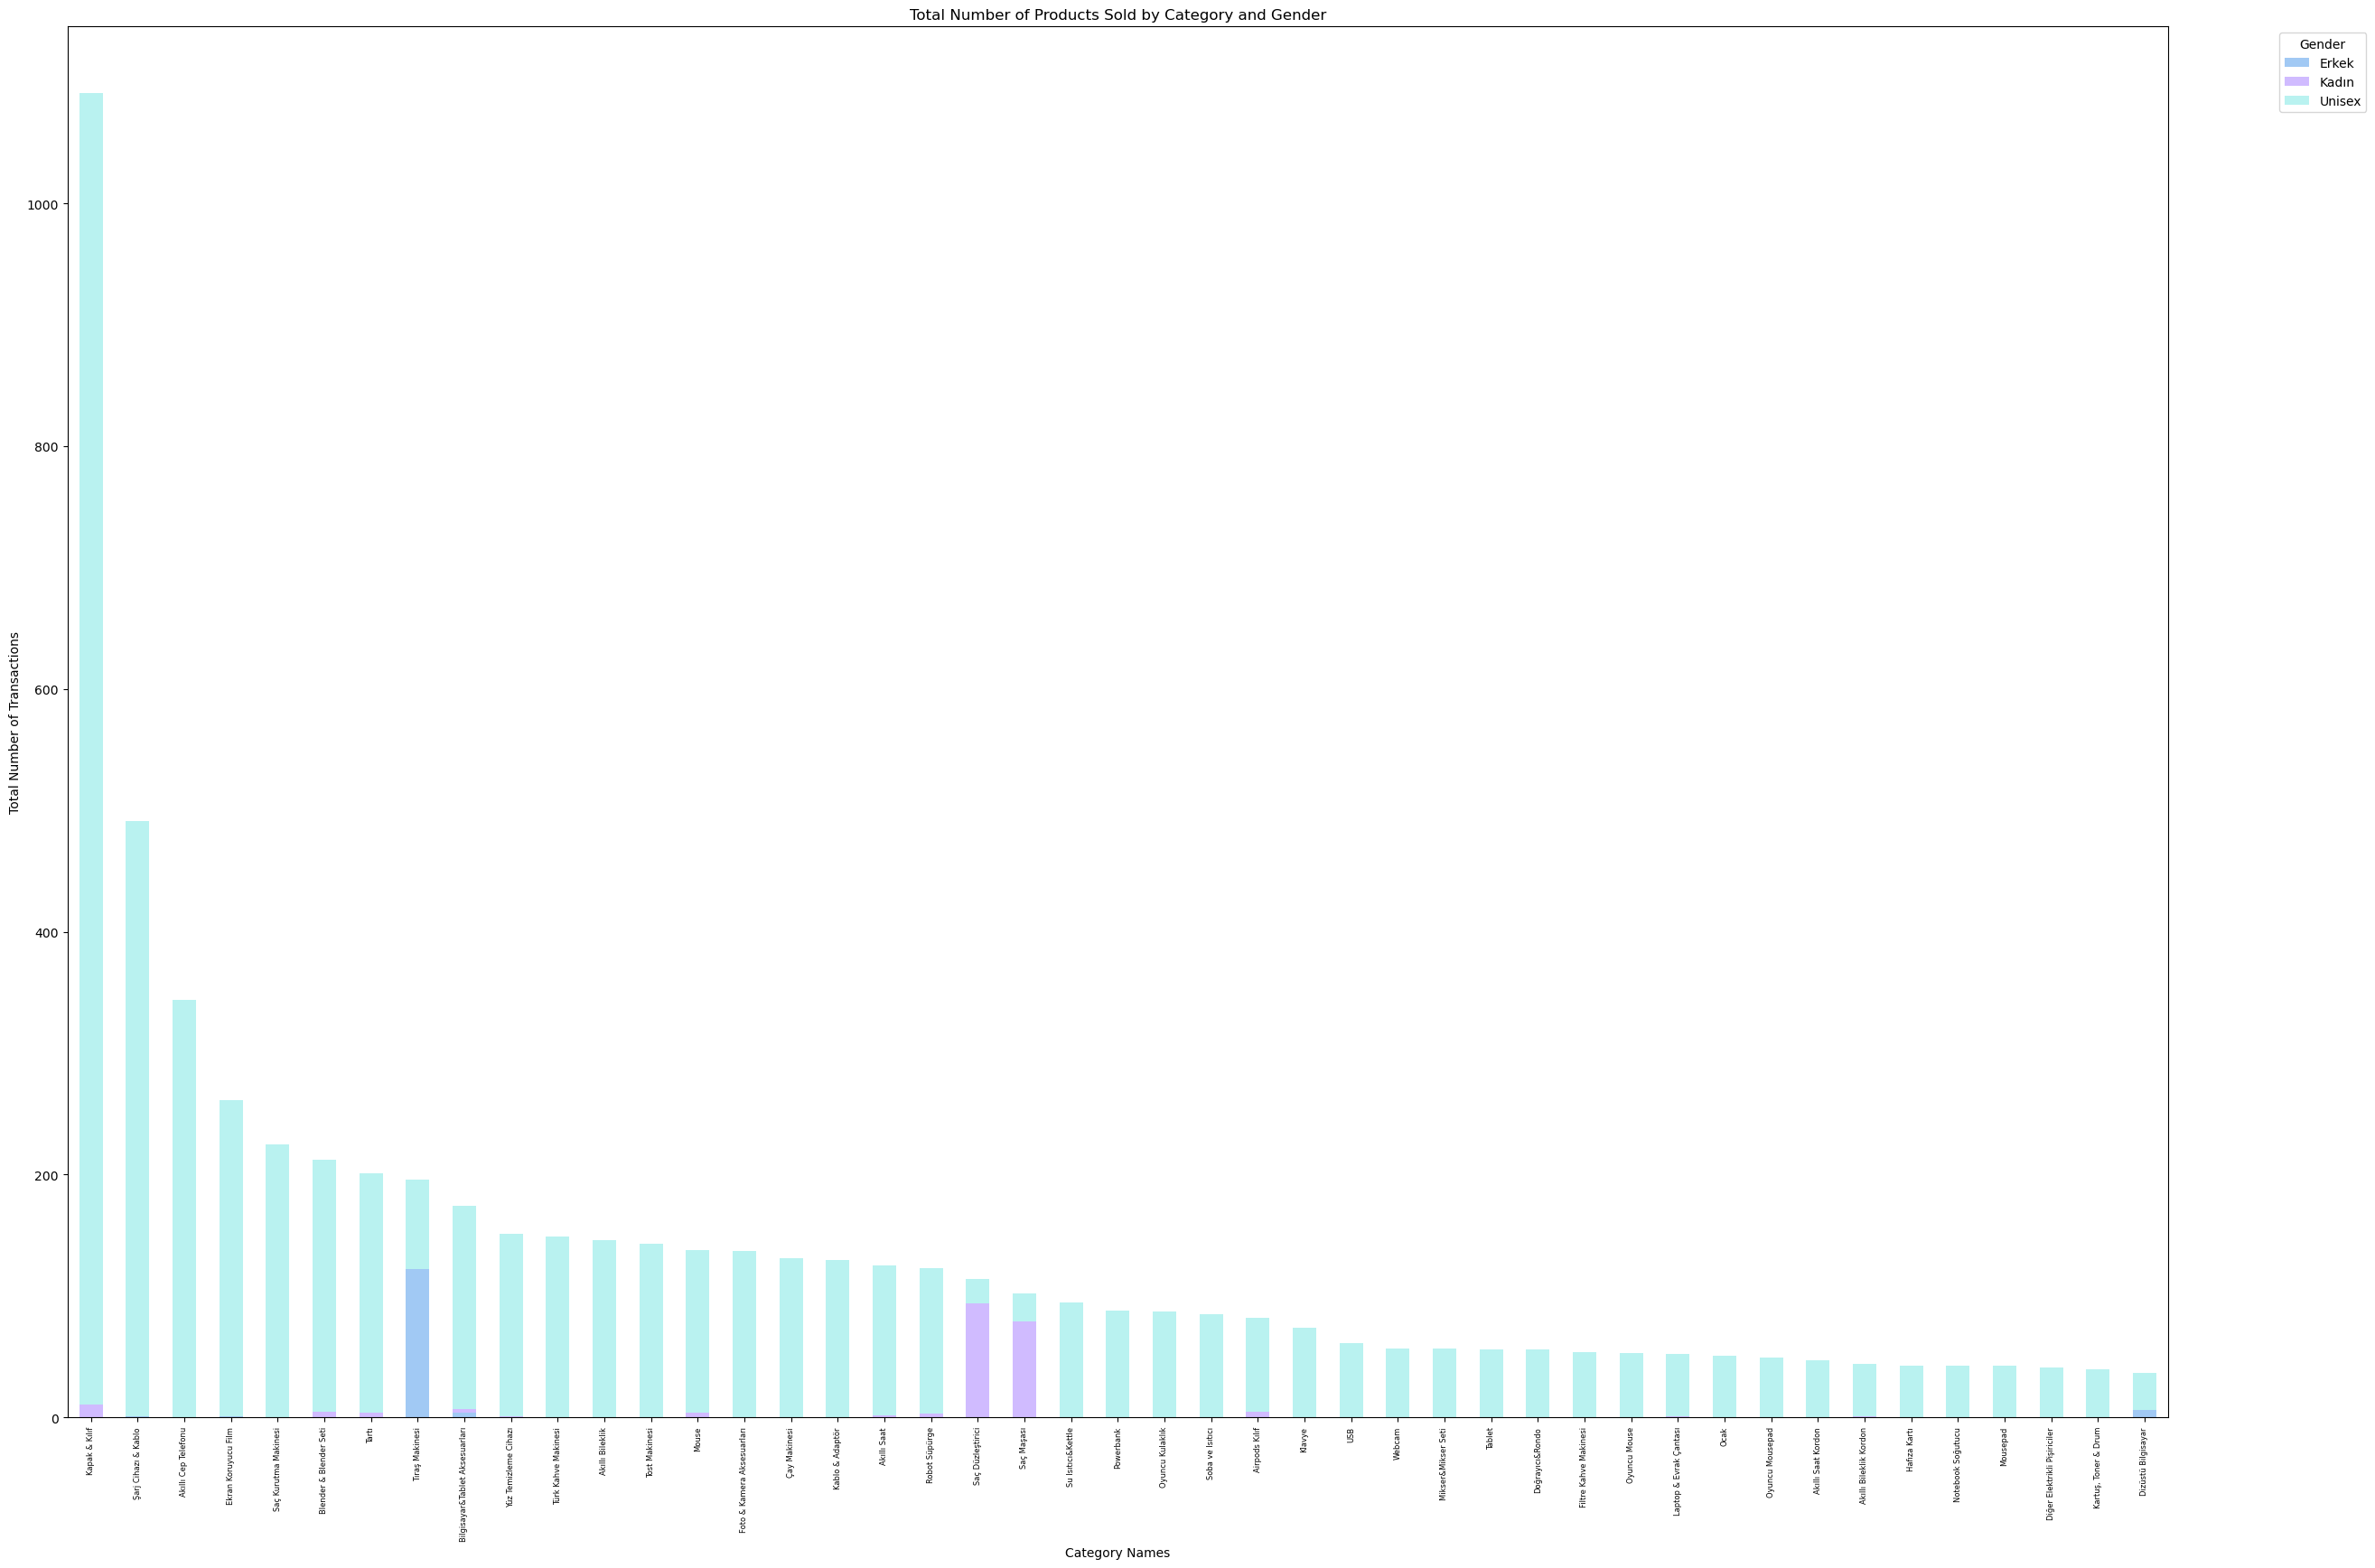

In [48]:
# one can create the plots for each currentbugroupname such as "Mobilya", "Elektronik"
df_trx_product_gm =  df_trx_product[df_trx_product["currentbugroupname"]=="Elektronik"]
grouped_data = df_trx_product_gm.groupby(["categoryname", "gender"]).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data[grouped_data['Total']>30]
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Erkek': colors[0], 'Kadın': colors[4], 'Unisex': colors[9]}


# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(30, 20), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products Sold by Category and Gender')
ax.set_xlabel('Category Names')
plt.xticks(fontsize=6)
ax.set_ylabel('Total Number of Transactions')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

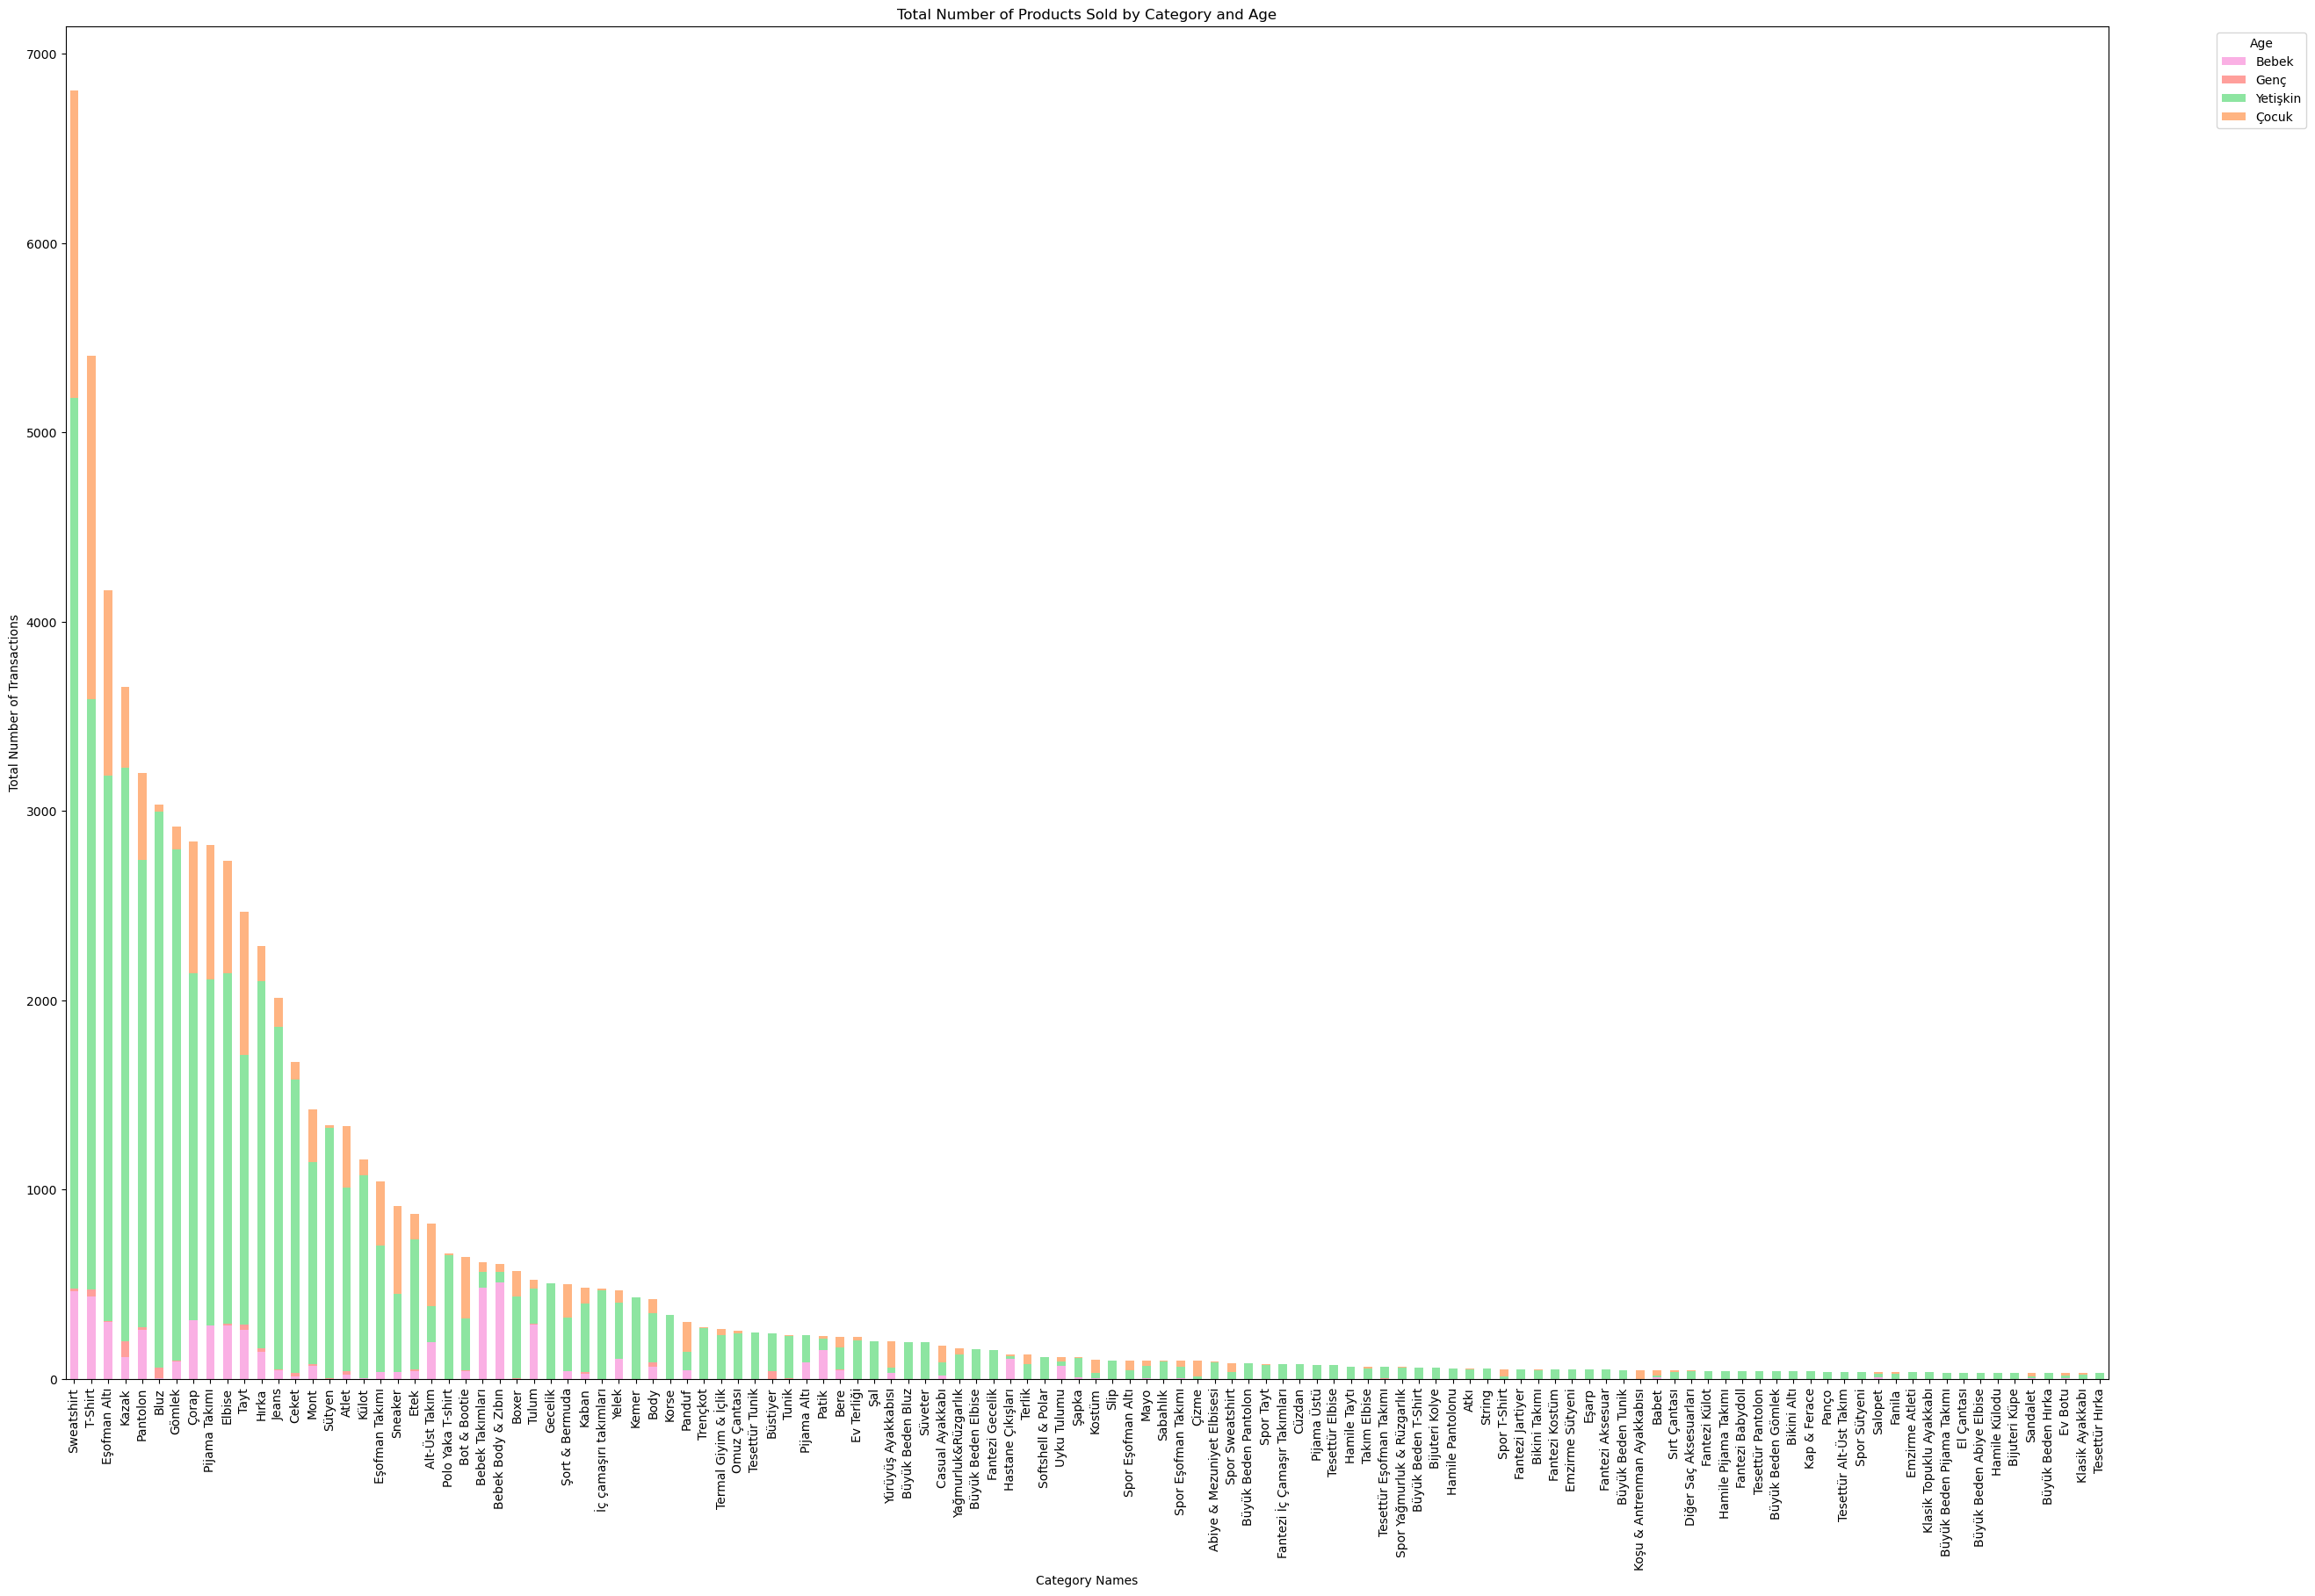

In [26]:
df_trx_product_gm =  df_trx_product[df_trx_product["currentbugroupname"]=="Branded Tekstil"]
grouped_data = df_trx_product_gm.groupby(["categoryname", "age"]).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data[grouped_data['Total']>30]
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for age categories 
age_palette = {'Yetişkin': colors[2], 'Çocuk': colors[1], 'Bebek': colors[6], 'Genç': colors[3]}


# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(30, 20), color=[age_palette[age] for age in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products Sold by Category and Age')
ax.set_xlabel('Category Names')
plt.xticks(fontsize=10)
ax.set_ylabel('Total Number of Transactions')
ax.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [27]:
df_trx['orderdate'] = pd.to_datetime(df_trx['orderdate'])

/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_1218/3548420359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx['orderdate'] = pd.to_datetime(df_trx['orderdate'])


In [28]:
# I need to divide orderdate column of df_trx into two parts; data and time:
df_trx["year"] = df_trx["orderdate"].dt.year
df_trx["month"] = df_trx["orderdate"].dt.month
df_trx["day"] = df_trx["orderdate"].dt.day
df_trx["hour"] = df_trx["orderdate"].dt.hour

/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_1218/2936051142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx["year"] = df_trx["orderdate"].dt.year
/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_1218/2936051142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trx["month"] = df_trx["orderdate"].dt.month
/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_1218/2936051142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

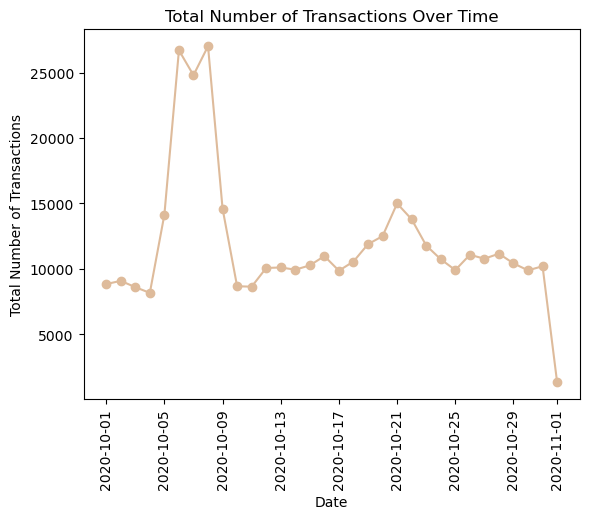

In [57]:
transactions_counts = df_trx.groupby(df_trx['orderdate'].dt.date).size()
plt.plot(transactions_counts.index, transactions_counts.values, marker='o', color = colors[5])
plt.xlabel('Date')
plt.ylabel('Total Number of Transactions')
plt.title('Total Number of Transactions Over Time')
plt.xticks(rotation=90)
plt.show()

#### df_basket

df_basket: Users' add to basket data
- **userid:** Unique ID of the user who has added the product to his/her basket. 
- **contentid:** Unique ID of the product which has been added to the basket by the user.
- **partition_date:** Date and hour of the "add to basket" event.
- **addtobasket_count:** How many times this event occured during this partition_date.

In [39]:
print(df_basket.shape)
min_date = df_basket.partition_date.min()
max_date = df_basket.partition_date.max()
print("min order date: ", min_date)
print("max order date: ", max_date)

(406268, 4)
min order date:  2020-10-01 03:00:00.000
max order date:  2020-10-31 03:00:00.000


In [40]:
df_basket.head(5)

,userid,contentid,partition_date,addtobasket_count
0,42366578,41474373,2020-10-31 03:00:00.000,1
1,35956834,43278838,2020-10-31 03:00:00.000,1
2,26139571,31714898,2020-10-31 03:00:00.000,2
3,3262246,47879560,2020-10-31 03:00:00.000,1
4,20056671,44746302,2020-10-31 03:00:00.000,1


#### df_fav

df_fav: Users' add to favorite data
- **userid:** Unique ID of the user who has added the product to his/her favorites.
- **contentid:** Unique ID of the product which has been added to the favorites by the user.
- **partition_date:** Date and hour of the "add to favorites" event.
- **fav_count:** How many times this event occured during this partition_date.

In [41]:
print(df_fav.shape)
min_date = df_fav.partition_date.min()
max_date = df_fav.partition_date.max()
print("min order date: ", min_date)
print("max order date: ", max_date)

(733827, 4)
min order date:  2020-10-01 03:00:00.000
max order date:  2020-10-31 03:00:00.000


In [ ]:
df_fav.head(5)

#### df_fav + df_product

In [42]:
df_fav_product = df_fav.merge(df_product, on='contentid', how='left')
df_fav_product.head(5)

,userid,contentid,partition_date,fav_count,currentbugroupname,brandid,gender,age,title,categoryname
0,17627638,32509331,2020-10-02 03:00:00.000,1,FMCG,42176.0,NaN,NaN,Elekli Kedi Tuvalet Önü Paspası 60 Cm X 45 Cm,Diğer Kedi Ürünleri
1,7757008,31759112,2020-10-08 03:00:00.000,1,NaN,NaN,NaN,NaN,NaN,NaN
2,7757008,53750743,2020-10-31 03:00:00.000,1,Branded Tekstil,10919.0,Kadın,Yetişkin,Kadın Desenli Pamuklu Likrali Düğmeli Pijama T...,Pijama Takımı
3,7757008,6508034,2020-10-14 03:00:00.000,1,Branded Tekstil,2825.0,Kadın,Yetişkin,Kadın Pemilo da Le Jardin 2 Beden Büyüten Dest...,Sütyen
4,7757008,31437207,2020-10-20 03:00:00.000,1,Branded Tekstil,4931.0,Kadın,Yetişkin,Kadın Ekru Delikli Yaka Detaylı Triko Bluz,Bluz


<Axes: xlabel='currentbugroupname'>

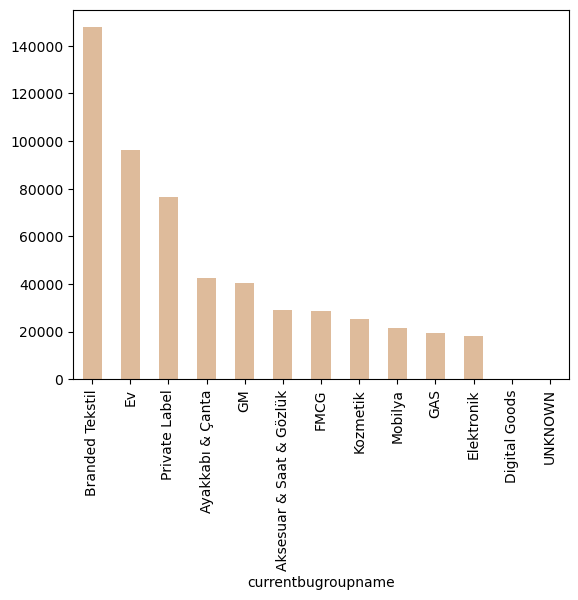

In [43]:
# a bar chart that shows total number of contentids for each currentbugroupname

df_fav_product.groupby('currentbugroupname')['contentid'].count().sort_values(ascending=False).plot(kind='bar', color=colors[5])

In [44]:
na_counts_fav_product = df_fav_product.isna().sum()
na_counts_fav_product

userid                     0
contentid                  0
partition_date             0
fav_count                  0
currentbugroupname    187904
brandid               187904
gender                252941
age                   269445
title                 188048
categoryname          187904
dtype: int64

## Funnel Analysis

### Steps

Funnel steps based on the user journey

1) Product Visit (Awareness)
2) Add to Basket (Interest)
3) Add to Favorites (Consideration)
4) Product Purchase (Conversion)

df_visit, df_basket, df_fav, and df_trx can be used respectivelly for the analysis.

Note that the period we are interested in matters some!

In [45]:
print("df_visit shape: ",df_visit.shape)
print("df_fav shape: ",df_fav.shape)
print("df_basket shape: ",df_basket.shape)
print("df_trx shape: ",df_trx.shape)

df_visit shape:  (14389920, 4)
df_fav shape:  (733827, 4)
df_basket shape:  (406268, 4)
df_trx shape:  (381525, 5)


### Conversion Rates

We need to calculate the percentage of users who moved from one step to the next. These values are called conversion rates.

!
In order to calculate conversion rates from one step to another, inner join approach has been employed. Note that we are interested in not only userid but also contentid. For example, a customer may add multiple items into its basket but a purchase has been made for just one item. The items that haven't been purchased is ignored in the conversion rate calculation.
!

In [46]:
def calculate_conversion_rate(df_from, df_to):
    
    merged_df = pd.merge(df_from, df_to, on=['userid', 'contentid'], how='inner')

    # Calculate the percentage of matched pairs
    conversion_rate = (len(merged_df) / len(df_from)) * 100
    # print(f"The percentage of userid and contentid pairs matched in both tables: {conversion_rate:.2f}%")

    return conversion_rate

In [47]:
print("Conversion rate from df_visit to df_basket: ",calculate_conversion_rate(df_visit, df_basket) )
print("Conversion rate from df_visit to df_fav: ",calculate_conversion_rate(df_visit, df_fav) )
print("Conversion rate from df_basket to df_trx: ",calculate_conversion_rate(df_basket, df_trx) )
print("Conversion rate from df_fav to df_trx: ",calculate_conversion_rate(df_fav, df_trx) )

Conversion rate from df_visit to df_basket:  0.030146102271590116
Conversion rate from df_visit to df_fav:  6.18893642216218
Conversion rate from df_basket to df_trx:  0.4359191469670267
Conversion rate from df_fav to df_trx:  4.50692056847186


## Predictive Statistics

### Train and Test Datasets

#### df_target_train

In [1]:
df_target_train.head(6)

NameError: name 'df_target_train' is not defined

In [ ]:
df_target_train = df_target_train.sort_values(by='userid')
df_target_train.head(20)

In [ ]:
print(df_target_train.shape)
print(df_target_train["userid"].nunique())

In [ ]:
print(df_target_train["currentbugroupname"].unique())

In [ ]:
# total number of currentbugroupname of each userid
df_target_train.groupby('userid')['currentbugroupname'].nunique()

In [ ]:
df_target_train.sort_values(by='userid')

#### df_test

In [ ]:
df_test.head(5)

In [ ]:
print(df_test.shape)
print(df_test["userid"].nunique())

In [ ]:
test_train_rate = df_test.shape[0] / df_target_train.shape[0]
print(test_train_rate)

In [ ]:
df_test.sort_values(by='userid')

In [ ]:
df_test.groupby('userid')['currentbugroupname'].nunique()

### Feature Engineering

In [ ]:
df_product_converted = df_product[["currentbugroupname", "contentid", "title", "categoryname"]].groupby("currentbugroupname").nunique()
df_product_converted